# HW 4

This assignment covers Linear Classification methods

**DO NOT ERASE MARKDOWN CELLS AND INSTRUCTIONS IN YOUR HW submission**
  * **Q** - QUESTION
  * **A** - Where to input your answer

## Instructions

Keep the following in mind for all notebooks you develop:
* Structure your notebook. 
* Use headings with meaningful levels in Markdown cells, and explain the questions each piece of code is to answer or the reason it is there.
* Make sure your notebook can always be rerun from top to bottom.
* Please start working on this assignment as soon as possible. If you are a beginner in Python this might take a long time. One of the objectives of this assignment is to help you learn python and scikit-learn package. 
* See [README.md](README.md) for homework submission instructions

## Related Tutorials

### Refreshers
* [Intro to Machine Learning w scikit-learn](https://scikit-learn.org/stable/tutorial/basic/tutorial.html)
* [A tutorial on statistical-learning for scientific data processing](https://scikit-learn.org/stable/tutorial/statistical_inference/index.html#stat-learn-tut-index)
 
### Classification Approaches
* [Logistic Regression with Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
* [KNN with sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
  
### Modeling   
* [Cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html)
* [Plot Confursion Matrix with Sklearn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
* [Confusion Matrix Display](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics)

# Data Processing

**Q1** Get training data from the dataframe
1. Load mobile_data.csv from ```data'' folder into the dataframe
3. Assign values of ```price_range``` column to ```y```
4. Drop 'price_range' column from data frame,
5. Assign remaining df column values to x
6. Print the head of the dataframe

**A1** Replace ??? with code in the code cell below

In [66]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

#Read the mobile_data.csv file using the appropriate separator as input to read_csv()
df = pd.read_csv('../data/mobile_data.csv', sep=',')

df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [67]:
# Code to assign values of "price_range" column to y variable
y = df.price_range.values

In [68]:
# Drop "price_range" column from dataframe
df.drop(columns=['price_range'], inplace=True)

# Assign remaining columns to x variable
x = df.values

In [69]:
# Show head of dataframe with "price_range" column dropped
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


**Q2:**
1. Check number of null values per column in the x dataframe.

**A2** Replace ??? with code in the code cell below

In [70]:
# The provided code was to manipulate the x variable but I found using the "df" dataframe much easier

# Check for nan values in "df" dataframe
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

**Q3.1**  Use seaborn heatmap chart to visualize the correlations between the columns.  Replace ??? with code in the code cell below

**A3.1**

<Axes: >

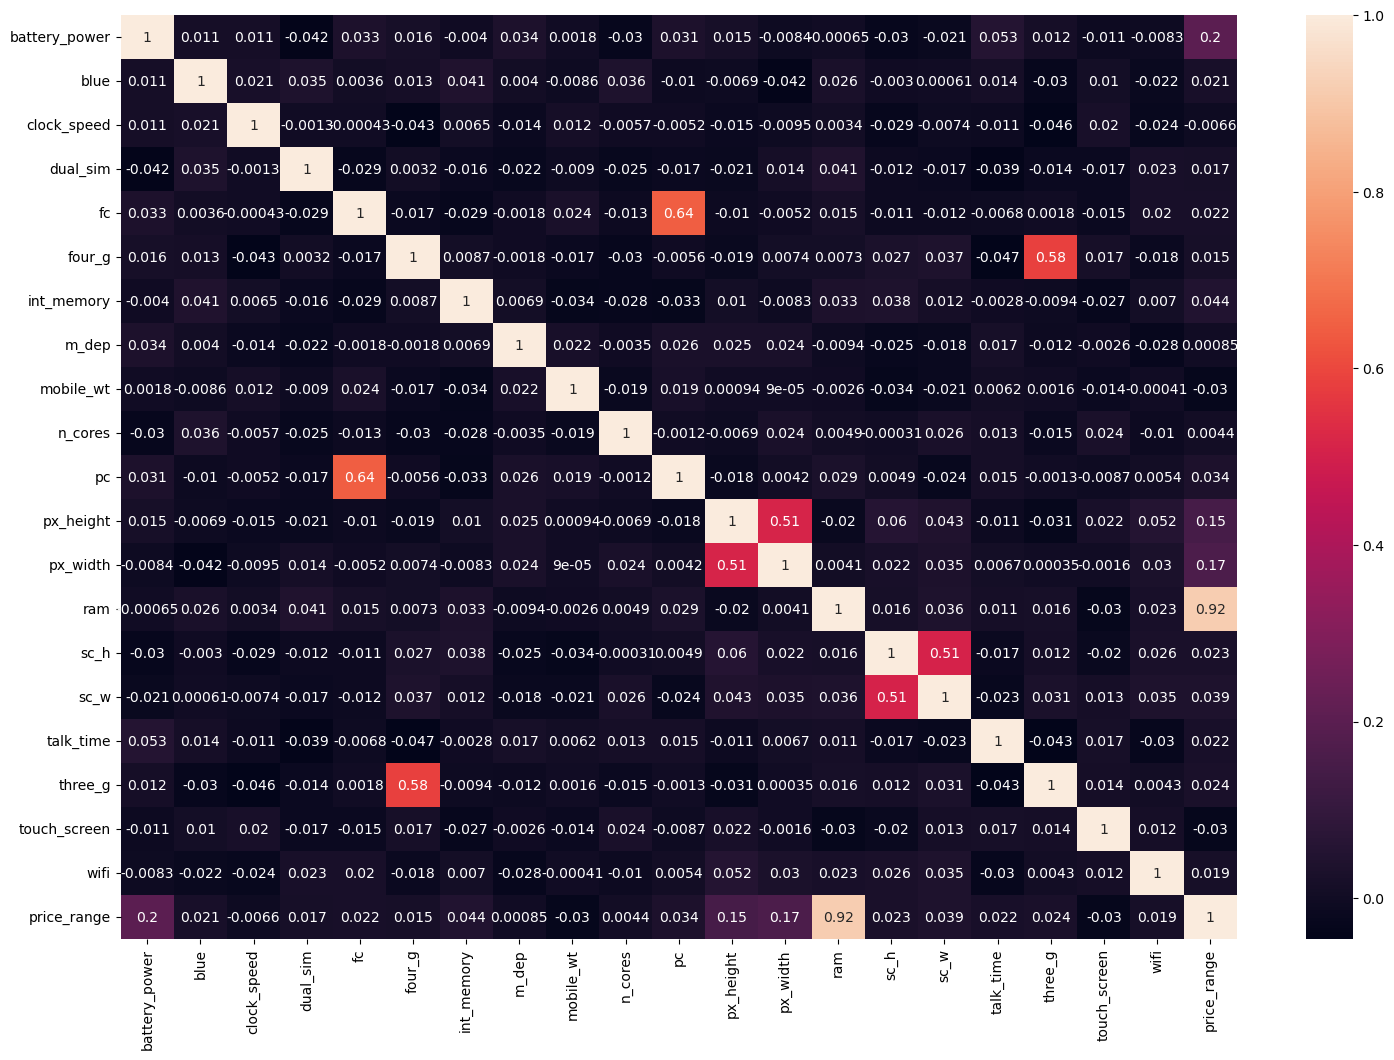

In [71]:
import seaborn as sns

# Create new dataframe still containing price_range column for determining correlations
df2 = pd.read_csv('../data/mobile_data.csv', sep=',')

# Create correlation matrix to fix heatmap to
corr_matrix = df2.corr()

# Specify size of heatmap generated
plt.figure(figsize=(18,12))

# generate heatmap
sns.heatmap(corr_matrix, annot=True)

**Q3.2** List columns that correlate the most with the 'price_range' column.

**Note:** For this dataset any column that has correlation factor over or near 0.1 can be considered as a good predictor/ feature. 

**A3.2** The columns that most correlate with the "price_range" column are (from greatest to least correlated) ram (0.92), battery_power (0.2), px_width (0.17), and px_height (0.15). All other columns have a correlation to the "price_range" column that is less than |0.1| <- absolute value

**Q3.3** Update the 'x' dataframe defined earlier in Q1 with your selected features/columns for 'price_range'.

**A3.3** Replace ??? with code in the code cell below

In [72]:
# A3 Part 3:

# Limit dataframe to 4 most correlated columns
df = df[['battery_power', 'px_height', 'px_width', 'ram']]

# verify dataframe contains only focus columns
print(df.head())

# reassign focus column values to x variable
x = df.values

   battery_power  px_height  px_width   ram
0            842         20       756  2549
1           1021        905      1988  2631
2            563       1263      1716  2603
3            615       1216      1786  2769
4           1821       1208      1212  1411


**Q4:** Use seaborn _histplot_ to plot a distribution graph for the price_range column

**A4** Replace ??? with code in the code cell below

<Axes: xlabel='price_range', ylabel='Count'>

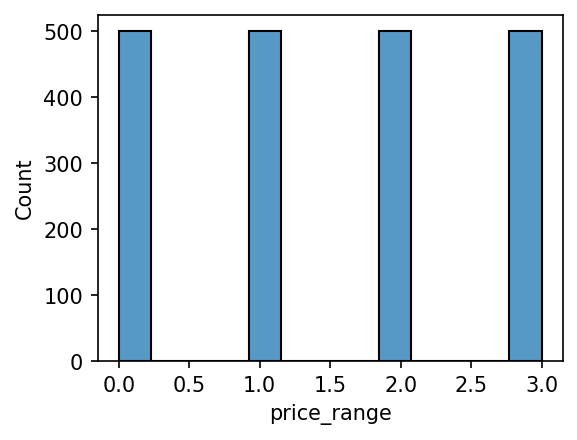

In [73]:
plt.figure(figsize=(4,3),dpi=150)
sns.histplot(data=df2['price_range'])

**Q5:** Use seaborn _histplot_ to present the relation between _price_range_ and the _ram_ of a mobile

**A5** Replace ??? with code in the code cell below

<Axes: xlabel='ram', ylabel='Count'>

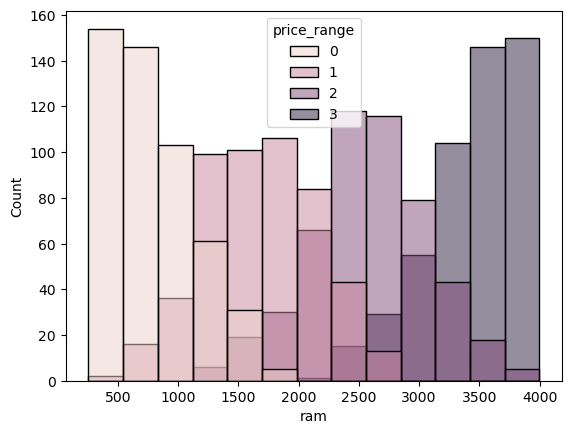

In [74]:
# I set the x-axis to measure "ram" and set the hue to "price_range",
# and you can see from the resulting histplot does show that (generally
# speaking), as the ram of the mobile increases, so too does the price_range
sns.histplot(data=df2, x="ram", hue="price_range")

**Q6:**
1. Use StandardScaler from sklearn to transform the x dataframe.
2. Split dataset into train and test data use train_test_split with test_size = 0.2 and random_state = 42
3. Check the number of instance in the train and test set.
4. Check the number of instance per class in train and test set using ytrain and ytest

**A6** Replace ??? with code in the code cell below

In [75]:
# create StandardScaler instance
scaler = StandardScaler()

# fit scaler to x data
scaler.fit(x)

# transform x data and store in same variable
x = scaler.transform(x)

In [76]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [77]:
print(len(xtrain), len(ytrain))
print(len(xtest), len(ytest))

1600 1600
400 400


In [78]:
ytrain.shape

(1600,)

In [79]:
ytest.shape

(400,)

# Classification Model 1: Logistic Regression

Here, we fit Logistic Regression model to the train dataset using K-fold cross validation

**Q7** Train Logistic Regression Model
1. Create a logistic regression model using sklearn [linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) library.
2. Fit the model with the train data 
3. Get the score from the model using test data
4. Plot confusion matrix using [ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html), see [Visualization with Display Objects](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html) example. 

**A7** Replace ??? with code in the code cell below

In [80]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create a logistic regression model using sklearn library
clf = LogisticRegression()

# Fit model with training data
clf.fit(xtrain, ytrain)

LogisticRegression()

In [81]:
#print score for test data
clf.score(xtest, ytest)

0.9725

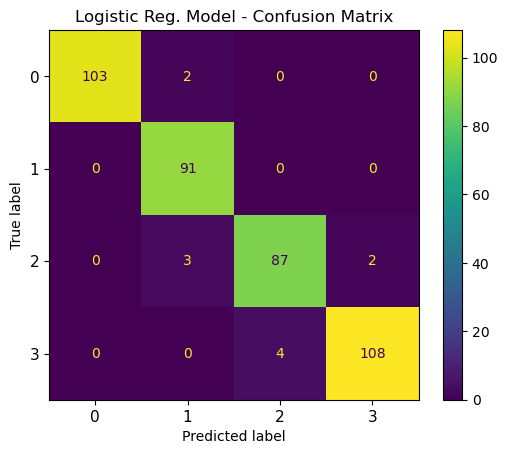

In [82]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# create a prediction to compare to true labels
y_pred = clf.predict(xtest)

# create confusion matrix comparing predictions to true labels
cm = confusion_matrix(ytest, y_pred, labels=clf.classes_)

# fit confusion matrix to a visual graph
matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
matrix.plot()

# tweak display graph appearance
plt.title("Logistic Reg. Model - Confusion Matrix")
plt.xticks([0,1,2,3], [0,1,2,3], fontsize=11)
plt.yticks([0,1,2,3], [0,1,2,3], fontsize=11)
plt.show()

**Q8:** Train Logistic Regression Model using cross-validation on _xtrain, ytrain_ data.
* Apply K fold cross validation technique for the model training (cross_val_score), and set K to 5 or 10. 
* Print the different scores from different folds

**A8:** Replace ??? with code in the code cell below

In [83]:
from sklearn.model_selection import cross_val_score

# Use sklearn for 5 fold cross validation 

# create LR model and fit it to training data
scores_log = LogisticRegression()
scores_log.fit(xtrain, ytrain)

# print the scores from different folds
print('Score with 5 folds: ', cross_val_score(scores_log, xtrain, ytrain, cv=5))
print('Score with 10 folds: ', cross_val_score(scores_log, xtrain, ytrain, cv=10))

Score with 5 folds:  [0.95625  0.953125 0.959375 0.95625  0.953125]
Score with 10 folds:  [0.93125 0.96875 0.96875 0.95    0.95    0.98125 0.975   0.93125 0.9375
 0.95625]


# Classification Model 2: K Nearest Neighbor Classifier

Here, we learn how to fit KNN on the train dataset using k-fold cross validation, and evaluate its classification accuracy on the train dataset using confusion matrix. 

**Q9** Build a KNN Classification Model for the dataset as following: 

1. Create a KNN model using sklearn library,  and initialize n_neighbors as described in [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). 
2. Fit the model with the train data 
3. Predict the values from test data
4. Print out the score from training and test data  
5. Repeat Step 1.- 4. for a range of ```n_neighbors``` values (k in kNN) from 1 to 30.

**A9** Replace ??? with code in the code cell below

In [84]:
from sklearn.neighbors import KNeighborsClassifier


# Define KNN model
for k in range(1,31):

    knn = KNeighborsClassifier(n_neighbors=k)

    #Fit KNN model on xtrain, ytrain from above
    knn.fit(xtrain, ytrain)
    #predict y values from xtest
    y_pred = knn.predict(xtest)

    #print score for test data
    print("K: ",k,"Train Score: ",knn.score(xtrain, ytrain), "Test Score: ",knn.score(xtest, ytest))

K:  1 Train Score:  1.0 Test Score:  0.8875
K:  2 Train Score:  0.933125 Test Score:  0.8675
K:  3 Train Score:  0.955 Test Score:  0.915
K:  4 Train Score:  0.92625 Test Score:  0.895
K:  5 Train Score:  0.930625 Test Score:  0.915
K:  6 Train Score:  0.92 Test Score:  0.91
K:  7 Train Score:  0.924375 Test Score:  0.91
K:  8 Train Score:  0.91875 Test Score:  0.9175
K:  9 Train Score:  0.92625 Test Score:  0.9225
K:  10 Train Score:  0.91875 Test Score:  0.9175
K:  11 Train Score:  0.9225 Test Score:  0.925
K:  12 Train Score:  0.92 Test Score:  0.9225
K:  13 Train Score:  0.924375 Test Score:  0.93
K:  14 Train Score:  0.92 Test Score:  0.91
K:  15 Train Score:  0.923125 Test Score:  0.915
K:  16 Train Score:  0.921875 Test Score:  0.915
K:  17 Train Score:  0.9225 Test Score:  0.915
K:  18 Train Score:  0.92 Test Score:  0.9025
K:  19 Train Score:  0.919375 Test Score:  0.9125
K:  20 Train Score:  0.9175 Test Score:  0.905
K:  21 Train Score:  0.91875 Test Score:  0.9
K:  22 Train 

**Q9 Part 2:** 

 What is the best ```n_neighbors```? Why?

**A9** The "n_neighbors" with the best test score was 13 neighbors (0.93)


**Q10.** 

1. Create a KNN Classifier model using the best value of k found from previous question.
2. Train the model using xtrain, ytrain values.
2. Plot confusion matrix for the xtest and ytest, using [ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html), see [Visualization with Display Objects](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html) example. 


**A10** Replace ??? with code in the code cell below


In [85]:
knn_best = KNeighborsClassifier(n_neighbors=13)

knn_best.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=13)

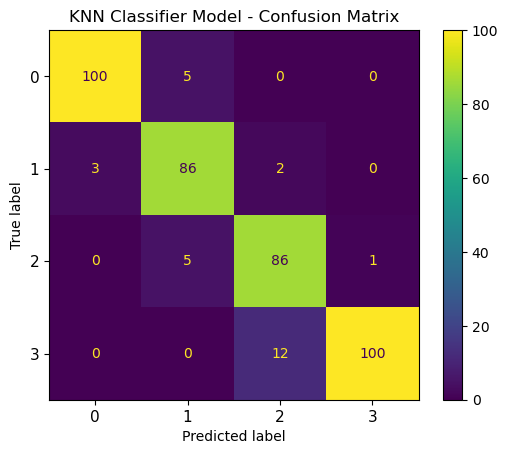

In [86]:
y_pred = knn_best.predict(xtest)

cm = confusion_matrix(ytest, y_pred, labels=knn_best.classes_)

#plt.figure()
matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_best.classes_)
matrix.plot()
plt.title("KNN Classifier Model - Confusion Matrix")
plt.xticks([0,1,2,3], [0,1,2,3], fontsize=11)
plt.yticks([0,1,2,3], [0,1,2,3], fontsize=11)
plt.show()

**Q11** Train KNN classifier using cross-validation approach, [sklearn.cross_validation](https://scikit-learn.org/stable/modules/cross_validation.html) tutorial.

**Note:**

Try a range of ```n_neighbors``` values (k in kNN) from 1 to 30. 

**A11** Replace ??? with code in the code cell below **

In [87]:
# Define KNN model
from sklearn.model_selection import cross_val_score

for k in range(1, 31):
    #Define KNN model
    knn_crossval = KNeighborsClassifier(n_neighbors=k)
    knn_crossval.fit(xtrain, ytrain)
    
    # Use sklearn for 5 fold cross validation 
    scores_cv= cross_val_score(knn_crossval, xtrain, ytrain, cv=5)

    # print the scores from different folds
    print('Score with ', k, ' folds: ', scores_cv)

Score with  1  folds:  [0.834375 0.8375   0.865625 0.859375 0.865625]
Score with  2  folds:  [0.85    0.85    0.84375 0.84375 0.85   ]
Score with  3  folds:  [0.88125  0.878125 0.85     0.846875 0.85625 ]
Score with  4  folds:  [0.875    0.865625 0.846875 0.853125 0.85    ]
Score with  5  folds:  [0.8625   0.890625 0.8625   0.86875  0.85625 ]
Score with  6  folds:  [0.86875  0.890625 0.865625 0.878125 0.85    ]
Score with  7  folds:  [0.88125  0.8875   0.865625 0.865625 0.865625]
Score with  8  folds:  [0.8875   0.871875 0.88125  0.865625 0.859375]
Score with  9  folds:  [0.875    0.88125  0.890625 0.8625   0.878125]
Score with  10  folds:  [0.86875  0.890625 0.896875 0.871875 0.86875 ]
Score with  11  folds:  [0.859375 0.909375 0.903125 0.884375 0.86875 ]
Score with  12  folds:  [0.8625   0.8875   0.9125   0.878125 0.86875 ]
Score with  13  folds:  [0.875    0.890625 0.915625 0.875    0.88125 ]
Score with  14  folds:  [0.859375 0.903125 0.915625 0.8625   0.86875 ]
Score with  15  fold

# Comparison

**Q12** Compare the two models (trained using xtrain,ytrain) in terms of score. 
* Train two different models on Train data
* Predict xtest using the trained models
* Make a correlation matrix between ytest and predicted ytest values from the two Models
* Your resulting matrix should be ```3x3 correlation matrix``` for xtest, ytest data
  * The matrix is symmetric
  * It will provide the correlation between two models predictions plus ytest
  * Hint: You can create a new dataframe using these values and use corr() function for creating the corelation matrix. Use meaningful column name while creating the dataframe.
  
**A12**
Replace ??? with code in the code cell below

(400,) (400,) (400,)


<Axes: >

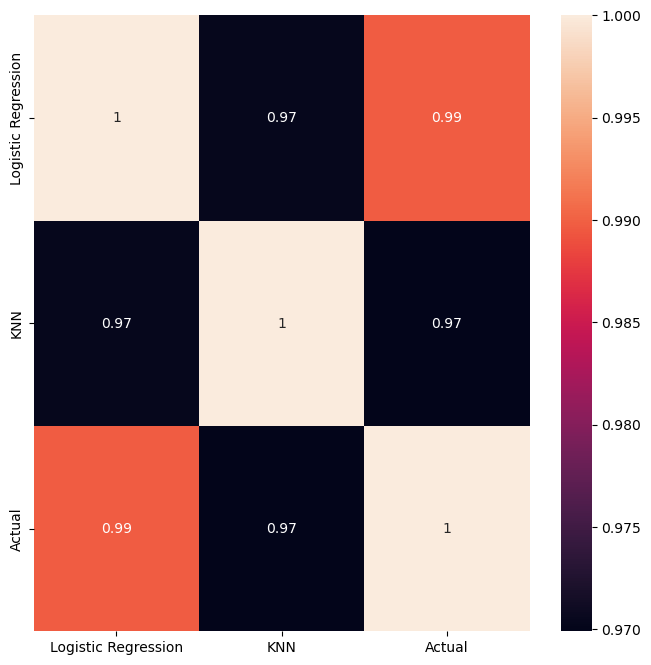

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict Train dataset using logistic reg
clf= LogisticRegression()
clf.fit(xtrain, ytrain)
ypred_clf = clf.predict(xtest)

# Predict Train dataset using KNN
knn = KNeighborsClassifier(n_neighbors=29)
knn.fit(xtrain, ytrain)
ypred_knn = knn.predict(xtest)

print(ytest.shape, ypred_clf.shape, ypred_knn.shape)
# Create a dataframe using the predicted results from the models
df = pd.DataFrame({'Logistic Regression':ypred_clf, 'KNN':ypred_knn, 'Actual':ytest})

# compute correlation 
corr_matrix = df.corr()

# Now use seaborn library to plot the heatmap correlation matrix
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot=True)